# Big Mart Sale Forecast Tahmini ve İstatistiki Analizi
Göksel Bilici END513 Uygulama Projesi

## 1. Giriş
Bu çalışma, BigMart tarafından 2013 yılı için 10 farklı şehirdeki 1559 ürün ve mağaza satışlarına dair toplanan verileri temel almaktadır. Veri seti, her ürün ve mağaza için belirli özellikleri içermektedir. Çalışmanın temel amacı, belirli bir mağazada satılan her ürünün satışlarını tahmin edebilecek bir model geliştirmektir. Bu model, ürünlerin ve mağazaların hangi özelliklerinin satışları artırmada kilit rol oynadığını anlamak için kullanılacaktır.

Ayrıca, veri setinin bazı mağazalardan eksik veri içerebileceği belirtilmiştir. Bu durum, teknik aksaklıklar nedeniyle oluşmuş olabileceğinden, eksik verilerin uygun şekilde işlenmesi gerekmektedir.

## 2. Problem Tanımı ve Çalışmanın Amacı
Problem Tanımı:

BigMart, mağazalarındaki satış performansını artırmak için ürünler ve mağaza özelliklerinin satış üzerindeki etkilerini anlamayı hedeflemektedir. Ancak, farklı şehirlerdeki mağazalar, ürün özellikleri ve satış dinamikleri arasında karmaşık bir ilişki bulunmaktadır. Ayrıca, bazı mağazalarda eksik veri sorunları yaşanması, doğru tahmin yapmayı daha da zorlaştırmaktadır.

Çalışmanın Amacı:

Bu çalışmanın amacı, belirli bir mağazada satılan her bir ürünün satışlarını tahmin edebilecek bir makine öğrenimi modeli geliştirmektir. Model, ürün ve mağaza özelliklerini dikkate alarak satış tahminleri yapacak ve bu tahminler, BigMart'ın satış stratejilerini optimize etmesine yardımcı olacaktır. Ayrıca, çalışmanın bir diğer amacı, veri setinde yer alan eksik verilerin uygun yöntemlerle işlenerek modelin doğruluğunu artırmaktır. Bu sayede, BigMart’ın ürün gruplarını daha etkin bir şekilde yönetmesi ve mağaza performansını artırması sağlanacaktır.

### Değişkenlerin Açıklanması
Aşağıda, veri setindeki değişkenler ve bu değişkenlerin çalışmaya olan katkıları detaylandırılmıştır:

- Item_Identifier: Ürün kimliği. Her bir ürüne atanan benzersiz bir kimlik numarasıdır. Veri takibi ve gruplama için kullanılır.
- Item_Weight: Ürünün ağırlığı. Ağırlık, bazı ürün kategorilerinde satış performansını etkileyebilecek önemli bir faktördür.
- Item_Fat_Content: Ürünün düşük yağlı olup olmadığını belirten değişken. Ürünün besin içeriği, tüketici tercihlerini etkileyebilir.
- Item_Visibility: Ürünün bir mağazadaki toplam sergileme alanının yüzdesi. Ürünlerin görünürlüğü, satış performansı üzerinde doğrudan bir etkiye sahip olabilir.
- Item_Type: Ürünün kategorisi. Ürünlerin hangi gruba ait olduğunu belirler; farklı kategoriler farklı satış dinamiklerine sahip olabilir.
- Item_MRP: Ürünün maksimum perakende satış fiyatı (liste fiyatı). Ürün fiyatlandırması, tüketici davranışlarını ve satışları önemli ölçüde etkileyebilir.
- Outlet_Identifier: Mağaza kimliği. Her bir mağaza için benzersiz bir kimlik numarasıdır ve mağaza bazlı analizler için kullanılır.
- Outlet_Establishment_Year: Mağazanın kuruluş yılı. Mağazanın yaşı, müşteri kitlesi ve satış performansını etkileyebilir.
- Outlet_Size: Mağazanın fiziksel büyüklüğü (zemin alanı). Mağaza boyutu, ürün çeşitliliği ve müşteri çekim gücünü etkileyen bir faktördür.
- Outlet_Location_Type: Mağazanın bulunduğu şehir türü (küçük, orta veya büyük şehir). Şehir tipi, müşteri demografisi ve satın alma davranışlarını etkileyebilir.
- Outlet_Type: Mağazanın türü (bakkal, süpermarket vb.). Mağaza türü, ürün çeşitliliği ve satış stratejileri üzerinde belirleyici bir rol oynar.
- Item_Outlet_Sales: Belirli bir mağazada bir ürünün satış miktarı. Bu, modelin bağımlı değişkenidir ve tahmin edilmesi amaçlanan sonuç değişkenidir.

Bu değişkenler, ürün ve mağaza özellikleri ile satış ilişkisini analiz etmek ve daha iyi satış tahminleri yapmak için kritik bir rol oynamaktadır.

In [103]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings('ignore')

#### Veri Yükleme ve Keşfetme & Tanıma

In [3]:
data = pd.read_csv('bmsf_train.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8522, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                7059 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                6112 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.isna().sum() / data.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.167332
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.279747
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
data.duplicated().sum()

np.int64(0)

## Eksik verileri Doldurma
Genelde sürekli verileri ortalama ile, kategorik verileri mod ile doldurmak daha mantıklı
- Ortalama <= Sürekli Item_Weight
- Mod <= Kategorik Outlet_Size

In [10]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [15]:
mode_of_outlet_size = data.pivot_table(
    values='Outlet_Size',
    columns = 'Outlet_Type',
    aggfunc = lambda x : x.mode()[0]
)

mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
missing_value = data['Outlet_Size'].isnull()
missing_value.value_counts()

Outlet_Size
False    6112
True     2410
Name: count, dtype: int64

In [17]:
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value,
        'Outlet_Size'] = data.loc[missing_value,
                                  'Outlet_Type'].apply(lambda x:
                                                       mode_of_outlet_size[x])

In [18]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,12.857370,0.066135,141.000471,1997.831964,2181.455027
std,4.226319,0.051600,62.274675,8.372247,1706.530835
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026988,93.844250,1987.000000,834.913200
50%,12.857370,0.053935,143.014100,1999.000000,1794.331000
75%,16.000000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Veriyi Görselleştirme ve Keşfetme

#### Item_Weight Dağılımı

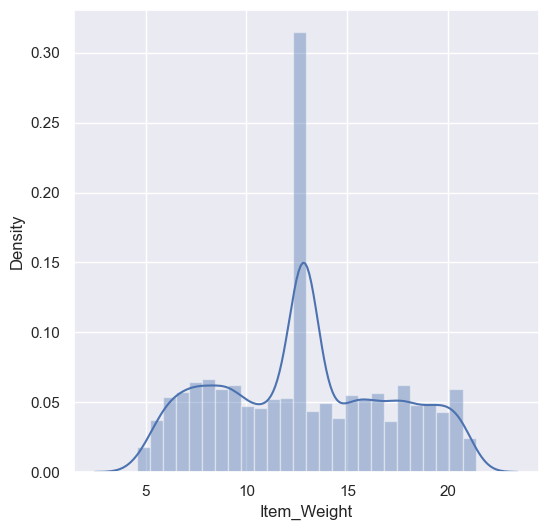

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

#### Item_Visibility Dağılımı

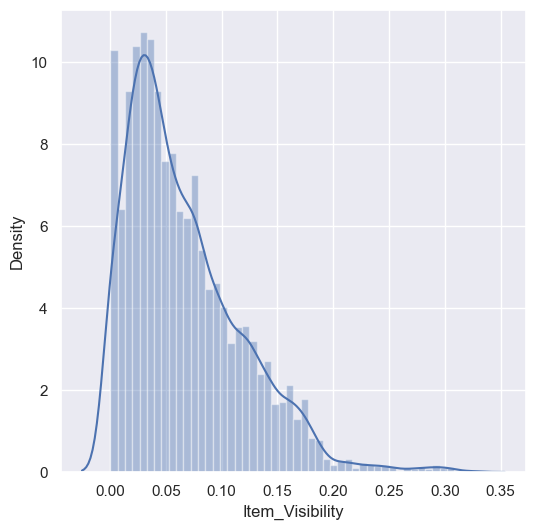

In [21]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

#### Item_MRP Dağılımı

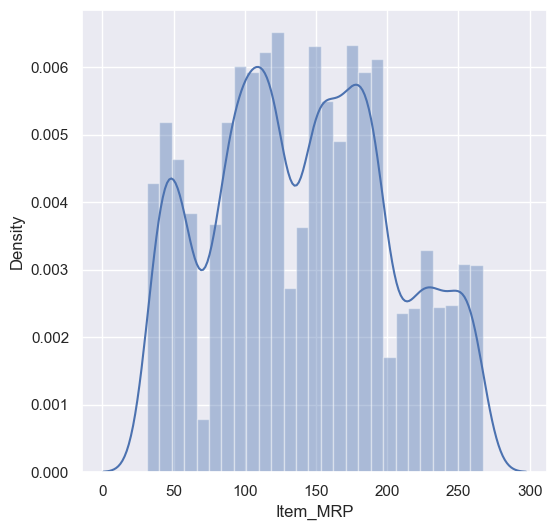

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

#### Outlet_Establishment_Year Sayısı

In [23]:
print(data['Outlet_Establishment_Year'].dtype)

int64


In [24]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'].astype('category')

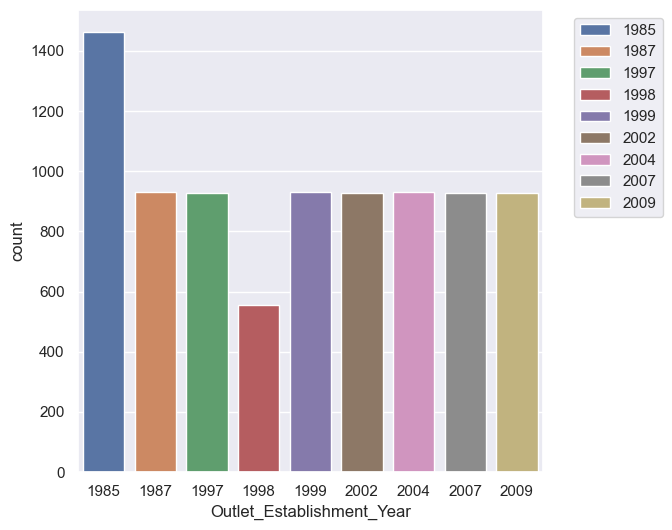

In [25]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",
              data=data,
              hue="Outlet_Establishment_Year")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

#### Item_Outlet_Sales Dağılımı

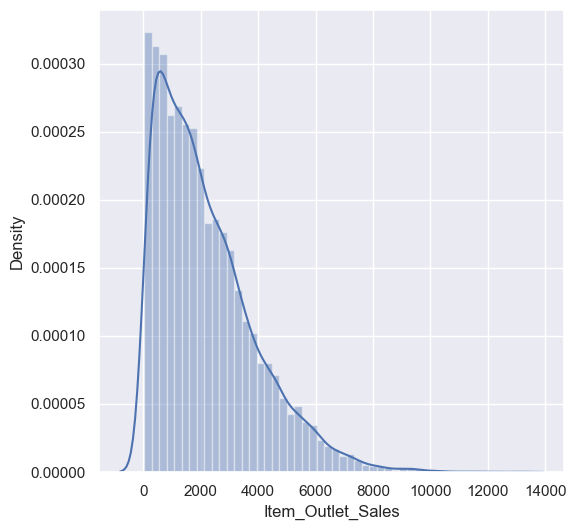

In [26]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

In [27]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#### Item_Fat_Content Sayısı

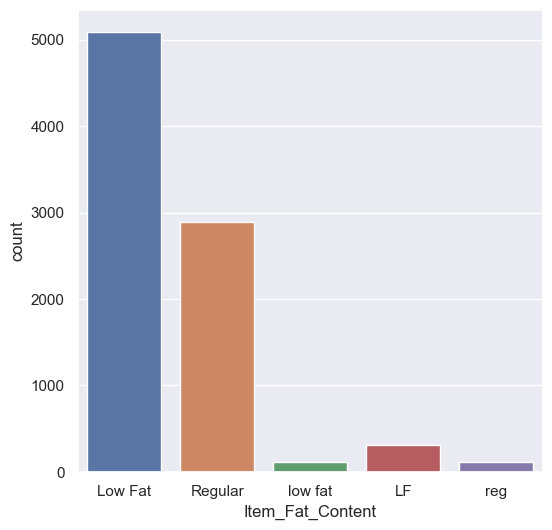

In [29]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",
              data=data,
              hue="Item_Fat_Content")
plt.show()

#### Item_Type Sayısı

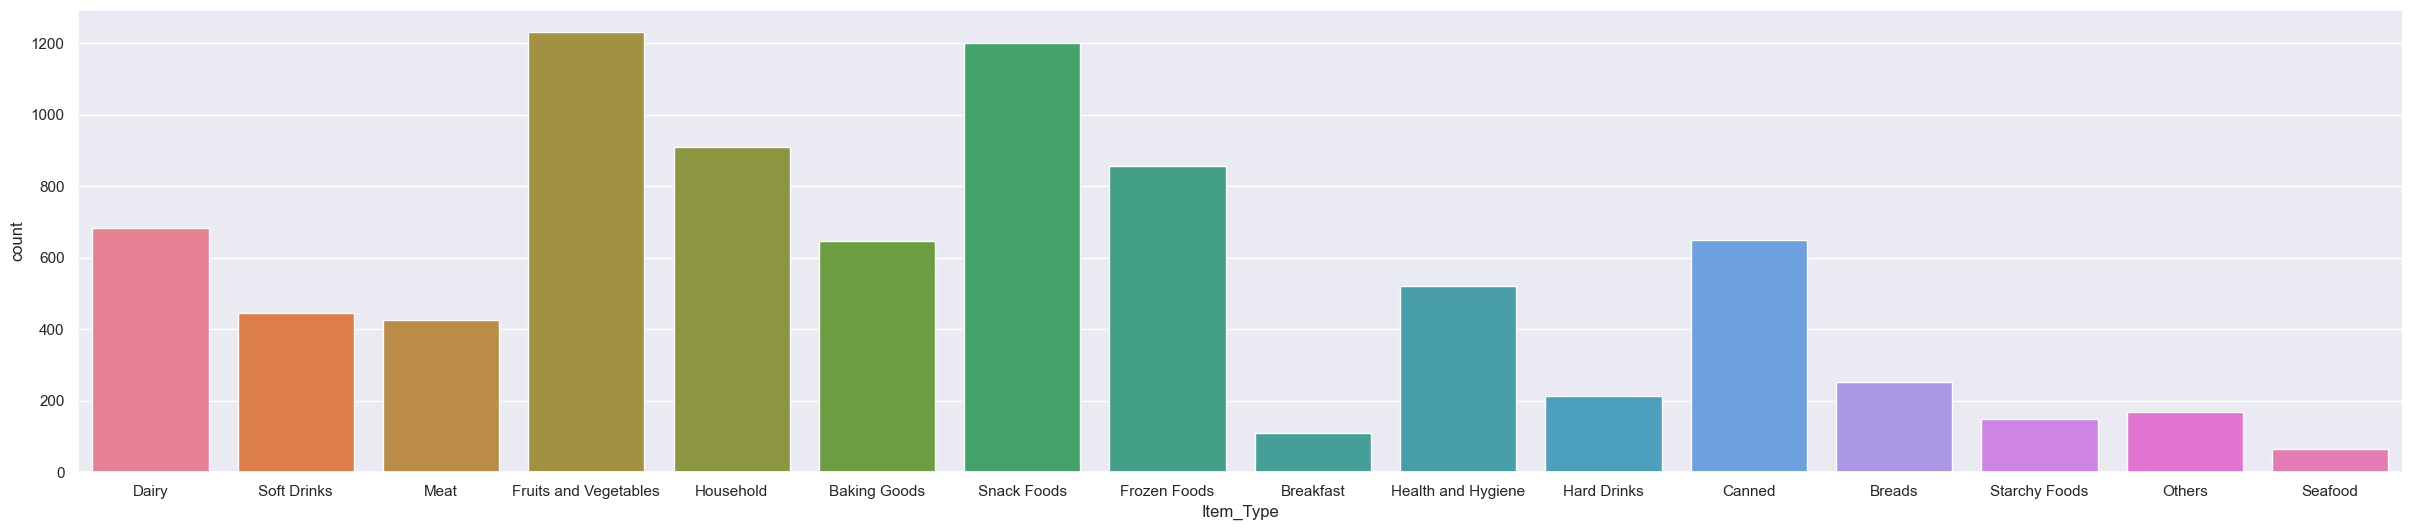

In [30]:
sns.set()
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",
              data=data,
              hue="Item_Type")
plt.show()

#### Outlet_Identifier Sayısı

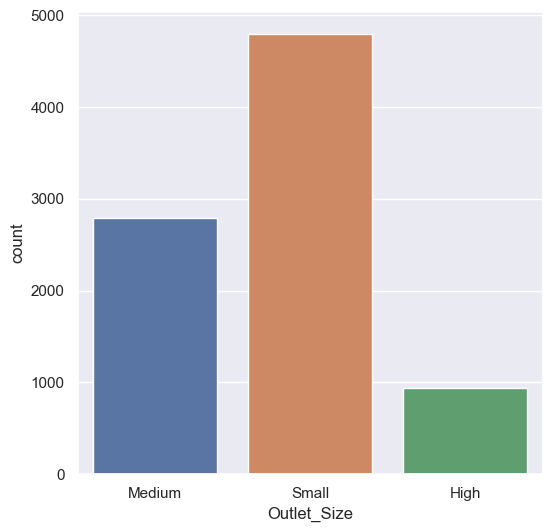

In [31]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size",
              data=data,
              hue="Outlet_Size")
plt.show()

#### Outlet_Location_Type Sayısı

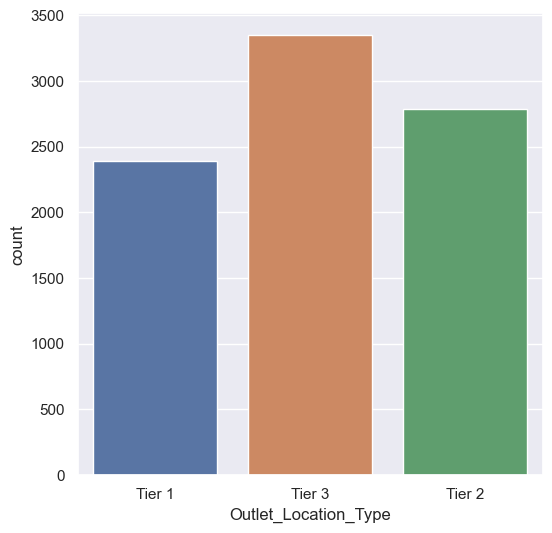

In [32]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Location_Type",
              data=data,
              hue="Outlet_Location_Type")
plt.show()

#### Outlet_Type Sayısı

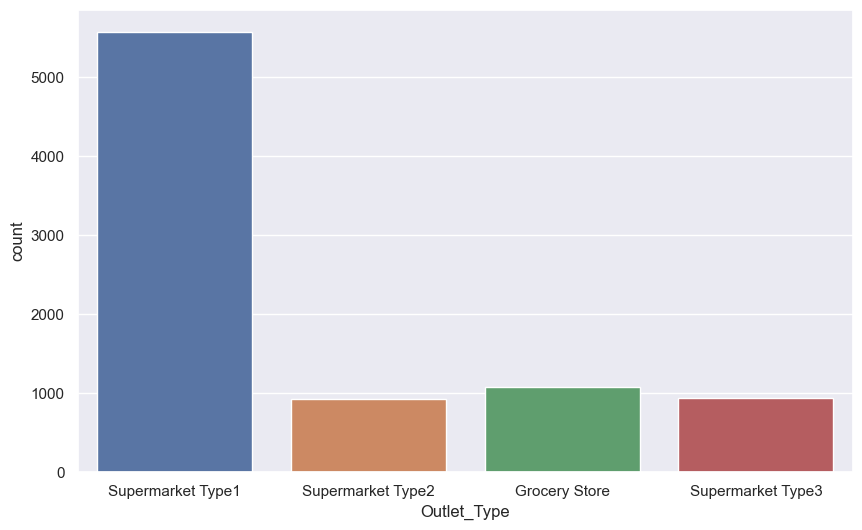

In [33]:
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x="Outlet_Type",
              data=data,
              hue="Outlet_Type")
plt.show()

In [34]:
data.replace({'Item_Fat_Content':
              {'low fat': 'Low Fat',
               'LF': 'Low Fat',
               'reg':'Regular'}},
             inplace=True)

In [35]:
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


#### Item_Fat_Content Sayısı

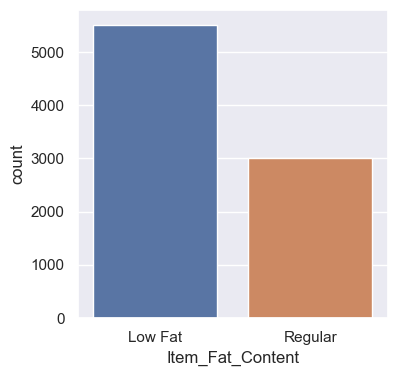

In [36]:
sns.set()
plt.figure(figsize=(4,4))
sns.countplot(x="Item_Fat_Content",
              data=data,
              hue="Item_Fat_Content")
plt.show()

In [37]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Take data to analyze below

In [38]:
# Take data to analyze below
data_analyze = data.copy()
data_analyze.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


## Python'da Etiket Kodlaması

Makine öğrenimi projelerinde, genellikle bazı sütunların elemanlarının sıralı değişken kategorisinde olduğu farklı kategorik sütunlara sahip veri kümeleriyle ilgileniriz, örneğin bir sütun gelir düzeyi düşük, orta veya yüksek elemanlara sahipse, bu durumda bu elemanları 1,2,3 ile değiştirebiliriz. Burada 1 'düşük'ü ,  2 ' orta'yı  ve 3' yüksek'i temsil eder. Bu tür kodlama yoluyla, daha yüksek ağırlıkların daha yüksek önceliğe sahip elemanlara atandığı elemanın anlamını korumaya çalışırız.

#### Etiket Kodlaması 
Etiket Kodlaması, kategorik sütunları sayısal sütunlara dönüştürmek için kullanılan bir tekniktir, böylece yalnızca sayısal veri alan makine öğrenimi modelleri tarafından uygulanabilirler. Makine öğrenimi projesinde önemli bir ön işleme adımıdır.

In [39]:
encoder = LabelEncoder()

In [40]:
# Encoding öncesi
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [41]:
data['Item_Identifier']  = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']  = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']  = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']  = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']  = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']  = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']  = encoder.fit_transform(data['Outlet_Type'])

In [42]:
# Encoding sonrası
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [43]:
# Veri Tipi
data.dtypes

Item_Identifier                 int64
Item_Weight                   float64
Item_Fat_Content                int64
Item_Visibility               float64
Item_Type                       int64
Item_MRP                      float64
Outlet_Identifier               int64
Outlet_Establishment_Year    category
Outlet_Size                     int64
Outlet_Location_Type            int64
Outlet_Type                     int64
Item_Outlet_Sales             float64
dtype: object

In [44]:
# Outlet_Establishment_Year kategori verisini sayısal veriye çevirelim
data["Outlet_Establishment_Year"] = data["Outlet_Establishment_Year"].astype(int)

### Veriyi test & train diye ayıralım

In [45]:
X = data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [46]:
X.shape

(8522, 11)

In [47]:
y.shape

(8522,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42)

In [49]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
metrics.r2_score(y_test, y_pred)

0.5165527878383627

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   int64  
 1   Item_Weight                8522 non-null   float64
 2   Item_Fat_Content           8522 non-null   int64  
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   int64  
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   int64  
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                8522 non-null   int64  
 9   Outlet_Location_Type       8522 non-null   int64  
 10  Outlet_Type                8522 non-null   int64  
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.1 KB


In [52]:
data.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
554,941,19.75,0,0.012519,6,190.6872,2,2007,2,1,1,4916.2672
7183,1527,18.35,0,0.030668,8,193.4162,2,2007,2,1,1,2116.5782
3785,1373,11.60,0,0.037794,8,99.3042,2,2007,2,1,1,2281.6966
3560,635,15.70,0,0.045296,5,181.3660,7,2002,2,1,1,1977.4260


In [53]:
input_data = (743,18.600,0,0.039356,5,246.3802,9,1999,1,0,1)
new_input = np.asanyarray(input_data,
                          dtype = float)
prediction = model.predict(new_input.reshape(1, -1))
print(prediction)

[6364.159]


# # ## ### #### ##### ###### ####### ######## ######### ##########

## STASTICAL ANALYSIS

In [96]:
data_analyze.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8522.0,12.857370,4.226319,4.555,9.310000,12.857370,16.000000,21.350000
Item_Visibility,8522.0,0.066135,0.051600,0.000,0.026988,0.053935,0.094594,0.328391
Item_MRP,8522.0,141.000471,62.274675,31.290,93.844250,143.014100,185.652250,266.888400
Item_Outlet_Sales,8522.0,2181.455027,1706.530835,33.290,834.913200,1794.331000,3101.296400,13086.964800


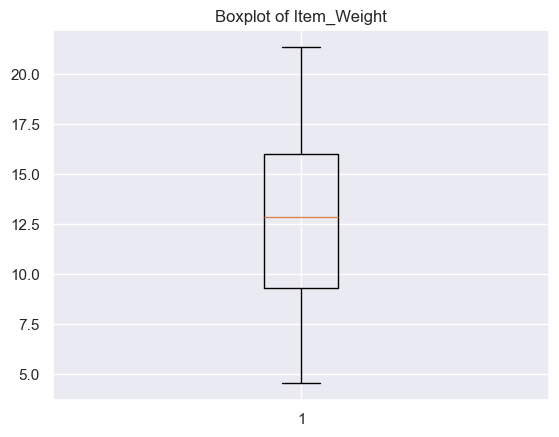

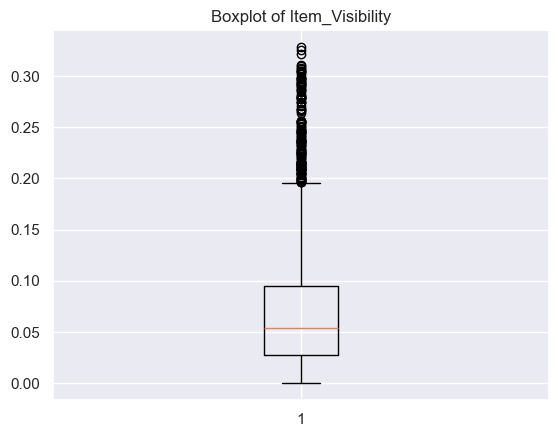

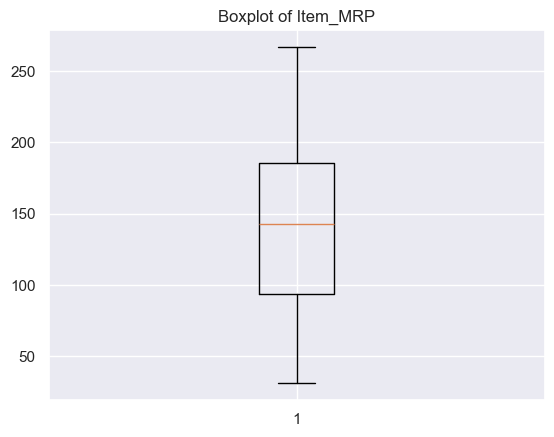

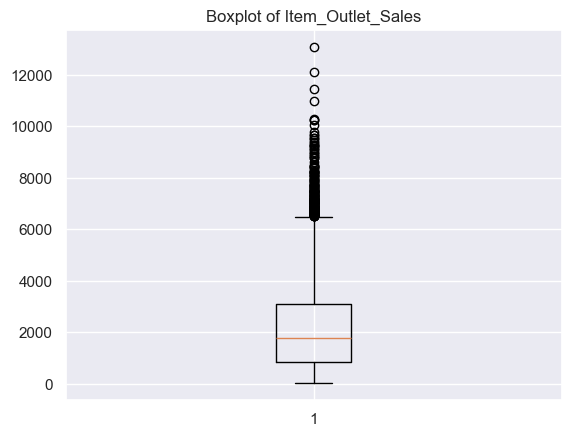

In [107]:
# inline yapalım ki çizimde hata olmasın
%matplotlib inline

# Kolonları arka arkaya basalım
for col in data_analyze.columns:
    if is_numeric_dtype(data_analyze[col]):  # Check if the column is numeric
        plt.boxplot(data_analyze[col].dropna())  # Drop missing values for plotting
        plt.title(f"Boxplot of {col}")  # Add a title for context
        plt.show()

## Normalite Testleri

### Test Statistic

In [111]:
from scipy.stats import kstest

# Perform the normality test column by column
for col in data_analyze.columns:
    if is_numeric_dtype(data_analyze[col]):  # Check if the column is numeric
        data = data_analyze[col].dropna()  # Drop NaN values to avoid issues
        test_stat, p_value = kstest(data, 'norm')  # Perform the KS test
        print(f"Column: {col}")
        print(f"Test Statistic: {test_stat}, P-value: {p_value}\n")

Column: Item_Weight
Test Statistic: 0.9999973807210835, P-value: 0.0

Column: Item_Visibility
Test Statistic: 0.5, P-value: 0.0

Column: Item_MRP
Test Statistic: 1.0, P-value: 0.0

Column: Item_Outlet_Sales
Test Statistic: 1.0, P-value: 0.0



### Standardized Test Statistic

In [113]:
from scipy.stats import zscore

# Perform the normality test column by column by standardizing it first
for col in data_analyze.columns:
    if is_numeric_dtype(data_analyze[col]):  # Check if the column is numeric
        data = data_analyze[col].dropna()
        standardized_data = zscore(data)  # Standardize the data
        test_stat, p_value = kstest(standardized_data, 'norm')
        print(f"Column: {col}")
        print(f"Test Statistic: {test_stat}, P-value: {p_value}\n")

Column: Item_Weight
Test Statistic: 0.10126730814362844, P-value: 1.5504975991564775e-76

Column: Item_Visibility
Test Statistic: 0.09996629330568363, P-value: 1.3725361430747902e-74

Column: Item_MRP
Test Statistic: 0.04563053980400644, P-value: 7.392434323201741e-16

Column: Item_Outlet_Sales
Test Statistic: 0.10403964034861879, P-value: 9.051884119094557e-81



### Jarque-Bera Test Statistic

In [114]:
import scipy.stats as stats

# Perform the Jarque-Bera test column by column
for col in data_analyze.columns:
    if is_numeric_dtype(data_analyze[col]):  # Check if the column is numeric
        data = data_analyze[col].dropna()  # Drop NaN values to avoid errors
        test_stat, p_value = stats.jarque_bera(data)  # Perform the Jarque-Bera test
        print(f"Column: {col}")
        print(f"Jarque-Bera Test Statistic: {test_stat}, P-value: {p_value}\n")

Column: Item_Weight
Jarque-Bera Test Statistic: 274.6900930781854, P-value: 2.2480407083184063e-60

Column: Item_Visibility
Jarque-Bera Test Statistic: 2932.198401359407, P-value: 0.0

Column: Item_MRP
Jarque-Bera Test Statistic: 304.06650831752984, P-value: 9.392834128822096e-67

Column: Item_Outlet_Sales
Jarque-Bera Test Statistic: 2893.096731840463, P-value: 0.0



In [120]:
# from pandas_profiling import ProfileReport
# profile_analyze = ProfileReport(data_analyze)
# profile_analyze

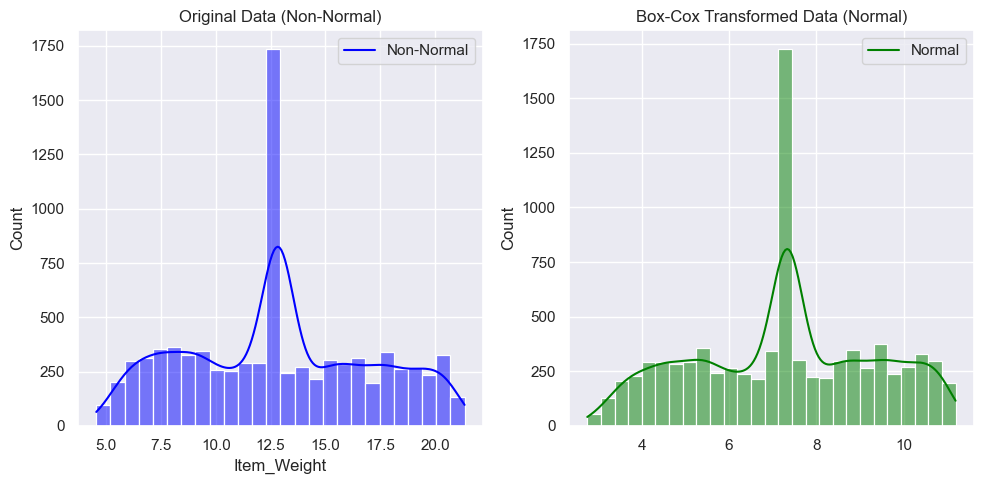

Column: Item_Weight
Jarque-Bera Test Statistic (Original): 274.6900930781854, P-value: 2.2480407083184063e-60
Jarque-Bera Test Statistic (Transformed): 260.4406193593049, P-value: 2.792788672983266e-57

Column Item_Visibility skipped: Contains non-positive values.



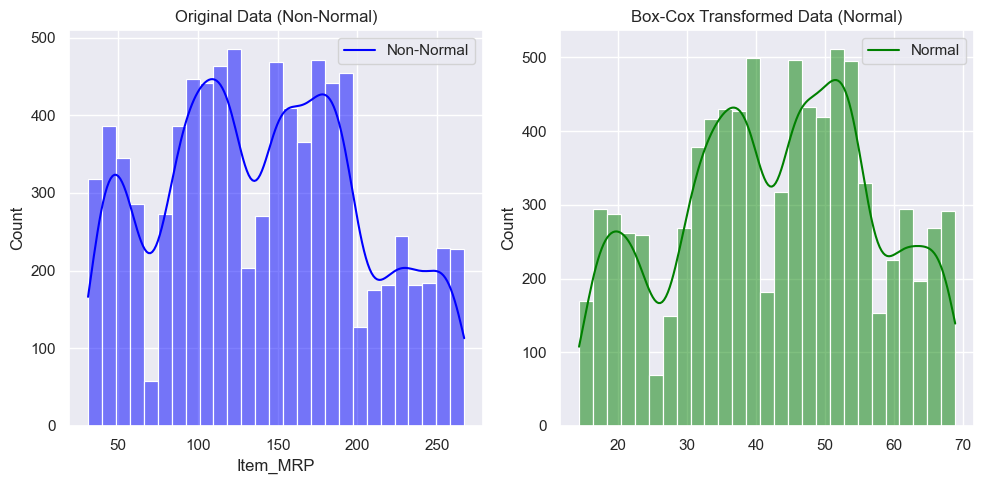

Column: Item_MRP
Jarque-Bera Test Statistic (Original): 304.06650831752984, P-value: 9.392834128822096e-67
Jarque-Bera Test Statistic (Transformed): 291.4293476193225, P-value: 5.211001907385774e-64



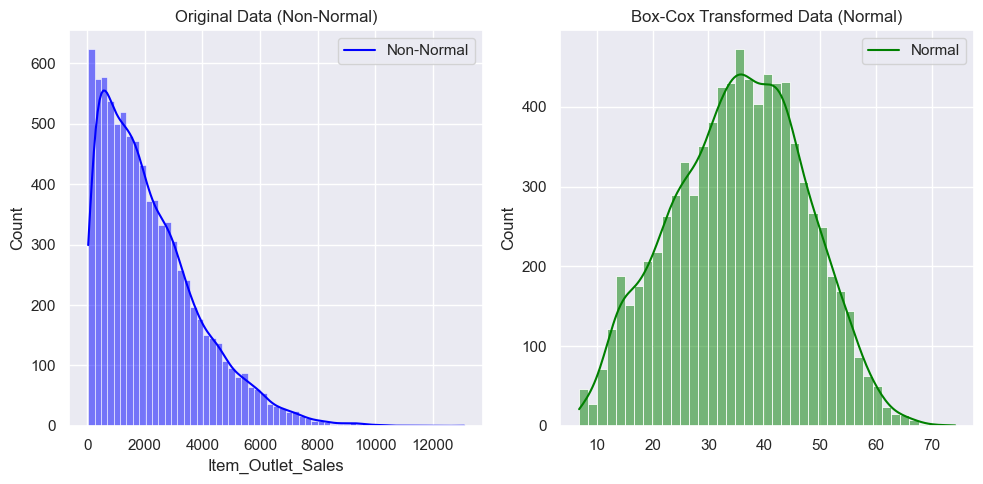

Column: Item_Outlet_Sales
Jarque-Bera Test Statistic (Original): 2893.096731840463, P-value: 0.0
Jarque-Bera Test Statistic (Transformed): 110.87041169499737, P-value: 8.410000028321516e-25



In [122]:
# Iterate through numeric columns
for i in range(data_analyze.shape[1]):  # Iterate over column indices
    if is_numeric_dtype(data_analyze.iloc[:, i]):  # Ensure column is numeric
        column_data = data_analyze.iloc[:, i].dropna()  # Drop NaN values
        
        # Apply Box-Cox transformation (Box-Cox only works for positive data)
        if (column_data > 0).all():  # Ensure all values are positive for Box-Cox
            fitted_data, fitted_lambda = stats.boxcox(column_data)

            # Create subplots for original and transformed distributions
            fig, ax = plt.subplots(1, 2, figsize=(10, 5))

            # Plot original data
            sns.histplot(column_data, kde=True, color="blue", ax=ax[0])
            ax[0].set_title("Original Data (Non-Normal)")
            ax[0].legend(["Non-Normal"], loc="upper right")

            # Plot transformed (Box-Cox) data
            sns.histplot(fitted_data, kde=True, color="green", ax=ax[1])
            ax[1].set_title("Box-Cox Transformed Data (Normal)")
            ax[1].legend(["Normal"], loc="upper right")

            # Display the plots
            plt.tight_layout()
            plt.show()

            # Perform Jarque-Bera test on the original data
            jb_stat, jb_p_value = stats.jarque_bera(column_data)
            print(f"Column: {data_analyze.columns[i]}")
            print(f"Jarque-Bera Test Statistic (Original): {jb_stat}, P-value: {jb_p_value}")

            # Perform Jarque-Bera test on the Box-Cox transformed data
            jb_stat_transformed, jb_p_value_transformed = stats.jarque_bera(fitted_data)
            print(f"Jarque-Bera Test Statistic (Transformed): {jb_stat_transformed}, P-value: {jb_p_value_transformed}\n")

        else:
            print(f"Column {data_analyze.columns[i]} skipped: Contains non-positive values.\n")

In [124]:
#perform Kolmogorov-Smirnov test
for i in range(data_analyze.shape[1]):
    print("Değişken:", fitted_data, "\t\t",kstest(fitted_data, 'norm'))

Değişken: [47.03312594 20.96608762 37.9835315  ... 22.80314045 30.72651341
 36.21243092] 		 KstestResult(statistic=np.float64(0.9999999999959708), pvalue=np.float64(0.0), statistic_location=np.float64(6.837505211826167), statistic_sign=np.int8(-1))
Değişken: [47.03312594 20.96608762 37.9835315  ... 22.80314045 30.72651341
 36.21243092] 		 KstestResult(statistic=np.float64(0.9999999999959708), pvalue=np.float64(0.0), statistic_location=np.float64(6.837505211826167), statistic_sign=np.int8(-1))
Değişken: [47.03312594 20.96608762 37.9835315  ... 22.80314045 30.72651341
 36.21243092] 		 KstestResult(statistic=np.float64(0.9999999999959708), pvalue=np.float64(0.0), statistic_location=np.float64(6.837505211826167), statistic_sign=np.int8(-1))
Değişken: [47.03312594 20.96608762 37.9835315  ... 22.80314045 30.72651341
 36.21243092] 		 KstestResult(statistic=np.float64(0.9999999999959708), pvalue=np.float64(0.0), statistic_location=np.float64(6.837505211826167), statistic_sign=np.int8(-1))
Deği

In [125]:
print("Değişken:", fitted_data, "\t\t",kstest(fitted_data, 'norm'))

Değişken: [47.03312594 20.96608762 37.9835315  ... 22.80314045 30.72651341
 36.21243092] 		 KstestResult(statistic=np.float64(0.9999999999959708), pvalue=np.float64(0.0), statistic_location=np.float64(6.837505211826167), statistic_sign=np.int8(-1))


In [126]:
fitted_data

array([47.03312594, 20.96608762, 37.9835315 , ..., 22.80314045,
       30.72651341, 36.21243092], shape=(8522,))

In [128]:
data_analyze.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


One-Sample K-S Test: Statistic=0.1040, p-value=0.0000
Reject H0: The data does not follow the normal distribution.


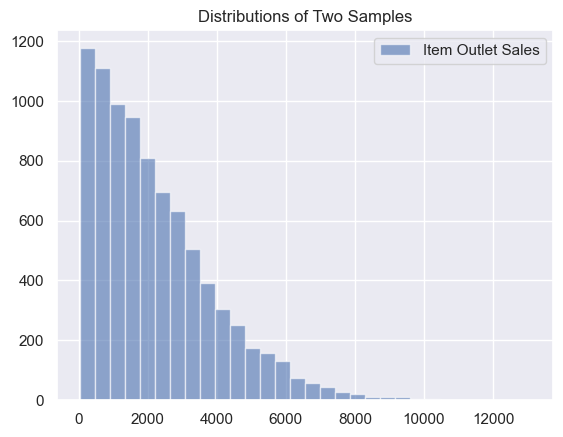

In [132]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt


# Generate or load your data
# Replace with your actual data
data_control = data_analyze["Item_Outlet_Sales"]

# One-Sample K-S Test: Test if the sample follows a normal distribution
def one_sample_ks_test(data_control):
    # Perform the K-S test against the normal distribution
    stat, p_value = kstest(data_control,
                           'norm',
                           args=(np.mean(data_control), np.std(data_control)))
    print(f"One-Sample K-S Test: Statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print("Fail to reject H0: The data follows the normal distribution.")
    else:
        print("Reject H0: The data does not follow the normal distribution.")


# Example Usage
# One-sample K-S Test
one_sample_ks_test(data_control)


# Plot the distributions for visualization
plt.hist(data_control, bins=30, alpha=0.6, label="Item Outlet Sales")
plt.legend()
plt.title("Distributions of Two Samples")
plt.show()

# # ## ### #### ##### ###### ####### ######## ######### ##########

# FIRST PROJECT IS BELOW

# Bireysel Gelir Tahmini ve İstatistiki Analizi
Göksel Bilici END513 Uygulama Projesi

## 1. Giriş
Bu çalışmada, bireylerin gelir seviyelerini tahmin etmeye yönelik bir analiz gerçekleştirilmiştir. Bankacılık sektöründe gelir bilgisi, çek ve kredi verme, işbirliği fırsatlarını değerlendirme ve yatırım kararları gibi birçok alanda hayati önem taşır. Gelir düzeylerinin doğru şekilde tahmin edilmesi, finansal risk yönetimi ve karar destek sistemlerinin etkinliğini artırabilir. Ancak, veri gizliliği ve Kişisel Verilerin Korunması Kanunu (KVKK) gibi yasal düzenlemeler nedeniyle, ideal veri kaynaklarına erişim sınırlıdır. Bu bağlamda, analiz için Amerika Birleşik Devletleri'ndeki yetişkin bireylere ait açık bir veri seti tercih edilmiştir. Çalışmada bu veri seti kullanılarak kapsamlı istatistiksel değerlendirmeler yapılacak ve gelir tahmini için etkili bir model geliştirilecektir.

## 2. Problem Tanımı ve Çalışmanın Amacı

#### Problem Tanımı:
Bankacılık sektöründe finansal hizmetlerin etkin yönetimi, bireylerin ve kurumların gelir seviyelerinin doğru tahminiyle doğrudan ilişkilidir. Ancak, veri gizliliği ve yasal düzenlemeler nedeniyle gerçek kişi verilerinin kullanımında ciddi kısıtlamalar bulunmaktadır. Bu durum, gelir tahmini için yeni veri kaynakları ve yöntemlere duyulan ihtiyacı artırmaktadır.

#### Çalışmanın Amacı:
Bu çalışmanın temel amacı, bireylerin gelirlerini tahmin edebilecek etkili bir model geliştirmek ve bu modelin bankacılık sektöründe nasıl uygulanabileceğini değerlendirmektir. Çalışmada, Amerika Birleşik Devletleri'ndeki bireylere ait demografik ve mesleki nitelikleri içeren bir veri seti üzerinde analizler gerçekleştirilmiştir. Bu analizler ile gelir tahmininde etkili değişkenler belirlenmiş ve önerilen modelin bankacılık sektöründeki risk yönetimi ve karar alma süreçlerine katkısı incelenmiştir.

In [54]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [55]:
warnings.filterwarnings("ignore")

##### Verileri yükleme

In [56]:
df = pd.read_csv("bireyler.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


##### Veriyi genel analiz

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Veride null yokmuş gibi görünüyor

In [58]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

##### Null yerine ? konulmuş eksik veriler yerine

In [59]:
df["occupation"].head()

0                    ?
1      Exec-managerial
2                    ?
3    Machine-op-inspct
4       Prof-specialty
Name: occupation, dtype: object

##### Veriyi düzenleyip tekrar kontrol edelim

In [60]:
df[df == '?'] = np.nan

In [61]:
df["occupation"].head()

0                  NaN
1      Exec-managerial
2                  NaN
3    Machine-op-inspct
4       Prof-specialty
Name: occupation, dtype: object

##### Eksik verilere bakma zamanı, oran olarak

In [62]:
df.isna().sum() / df.shape[0] * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [63]:
# Şimdi satırlardaki Null değerlerini bulalım
rows_with_null = df.isnull().any(axis=1)
# print(f"Satırlardaki NaN: \n{df[rows_with_null]}") # Null olan satırları görmek için bunu uncomment yapın

In [64]:
# Şimdi deNull olan toplam satır sayısını bulalım
count_null_rows = rows_with_null.sum()
print(f"Satır sayısı NaN: {count_null_rows}")

Satır sayısı NaN: 2399


#### Null Analizi
Yukarıda gözlemlediğimiz üzere, "workclass" sütununun %5.6'sı, "occupation" sütununun yine %5.6'sı ve "native.country" sütununun %1.6'sı eksik veriden oluşmaktadır. Bu sütunlardaki eksik veriler, toplam veri setinin küçük bir kısmını temsil ettiğinden, bu sütunları tamamen veri setinden çıkarmak verimli bir yöntem olmayacaktır. Ayrıca, eksik veriler potansiyel olarak değerli bilgiler içerebilir ve modelimiz için anlamlı katkılar sağlayabilir. İlk etapta, bu eksik verileri en sık görülen değerle (mod) doldurmak mantıklı görünse de, toplam veri sayısının fazla olması nedeniyle daha etkili bir yaklaşımı değerlendirdim. Yapılan analiz sonucunda, 32.561 toplam veri içerisinde yalnızca 2.399'unun eksik değerlere sahip olduğunu gördüm. Bu durum, eksik verileri silmenin daha pratik ve etkili bir yöntem olacağına karar vermeme neden oldu.

In [65]:
# Satırlarında Null değerler olan verileri silelim
df_cleaned = df.dropna()

print("Original DataFrame:")
print(len(df))
print("\nNaN değerleri olmadan nDataFrame:")
print(len(df_cleaned))

Original DataFrame:
32561

NaN değerleri olmadan nDataFrame:
30162


In [66]:
# Tekrar verilerimizi kontrol edelim
df_cleaned.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### df_cleaned
```df_cleaned``` veri setinde görüldüğü üzere tüm eksik veriler temizlendi. Artık bir sonraki aşamaya geçebiliriz.
Yeni veri dataframe'imizde null değeri bulunmuyor

In [67]:
df_cleaned.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [68]:
list(df_cleaned.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

#### Değişkenlerin Açıklanması
Bu bölümde, veri setindeki değişkenler açıklanarak her bir değişkenin proje kapsamındaki anlam ve rolü detaylandırılmıştır:
- ```age```: Bireyin yaşı. Gelir tahmini için potansiyel bir etkendir, zira yaş faktörü genellikle mesleki tecrübe ve gelir düzeyi ile ilişkilidir.
- ```workclass```: Çalışma sınıfı. Bireyin çalıştığı kurum veya iş türünü ifade eder (örneğin, özel sektör, kamu sektörü, kendi hesabına çalışan vb.). Çalışma sınıfı, gelir seviyesini etkileyen önemli bir demografik göstergedir.
- ```fnlwgt```: Örnek ağırlığı (final weight). Bu değişken, veri setindeki her bir bireyin, toplam popülasyondaki temsil oranını ifade etmektedir. Örneklem ağırlığı, nüfus bazlı analizlerde dikkate alınması gereken bir değişkendir.
- ```education```: Eğitim durumu. Bireyin en yüksek eğitim seviyesi; gelir düzeyini etkileyen temel faktörlerden biridir.
- ```marital.status```: Medeni durum. Bireyin evli, bekar, dul vb. gibi medeni statüsünü ifade eder ve demografik analizler için önem taşır.
- ```occupation```: Meslek. Bireyin çalıştığı meslek dalını ifade eder ve gelir tahmini için kilit bir değişkendir.
- ```relationship```: İlişki durumu. Bireyin aile içerisindeki konumunu (örneğin, eş, çocuk, ebeveyn) belirtir. Sosyoekonomik durum analizlerinde etkili olabilir.
- ```race```: Irk. Bireyin ırksal kökenini ifade eder. Sosyoekonomik eşitsizliklerin incelenmesinde kullanılabilir.
- ```sex```: Cinsiyet. Bireyin erkek ya da kadın olarak tanımlanan cinsiyetini ifade eder. Gelir farklılıklarının cinsiyet temelli analizinde önemli bir değişkendir.
- ```capital.gain```: Sermaye kazancı. Bireyin yıl içerisinde edindiği yatırım gelirlerini ifade eder. Gelir dağılımı ve servet analizi için kritik bir göstergedir.
- ```capital.loss```: Sermaye kaybı. Bireyin yıl içerisinde yaşadığı yatırım kayıplarını ifade eder. Gelir analizi ve finansal durum değerlendirmesi için önem taşır.
- ```hours.per.week```: Haftalık çalışma saati. Bireyin haftada kaç saat çalıştığını ifade eder. Çalışma yoğunluğu ile gelir arasındaki ilişkiyi analiz etmek için kullanılır.
- ```native.country```: Doğduğu ülke. Bireyin doğum yeri; göçmenlik durumu ve sosyoekonomik analizler için bir referans niteliğindedir.
- ```income```: Gelir. Bireyin gelir düzeyini ifade eden hedef değişkendir. Gelir tahmin modelinin bağımlı değişkeni olarak kullanılacaktır.

In [69]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Tek Değişkenli Değişken Analizi

* Kategorik Değişkenler: workclass, education, marital.status, occupation, relationship, race, sex, native.country, income
* Sürekli Değişkenler: age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week

## Kategorik Değişkenler:

In [70]:
def bar_plot(df_cleaned, variable):
    # değişkeni belirliyoruz
    var = df_cleaned[variable]
    # kaç tane olduğunu sayıyoruz her bir değişkenin ki grafikte anlaşılmayan anlaşılsın
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
     

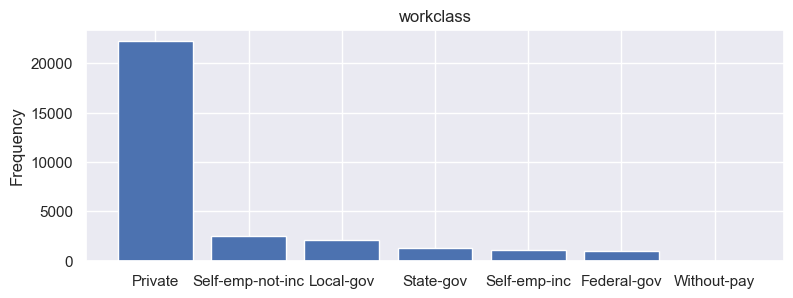

workclass: 
 workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64


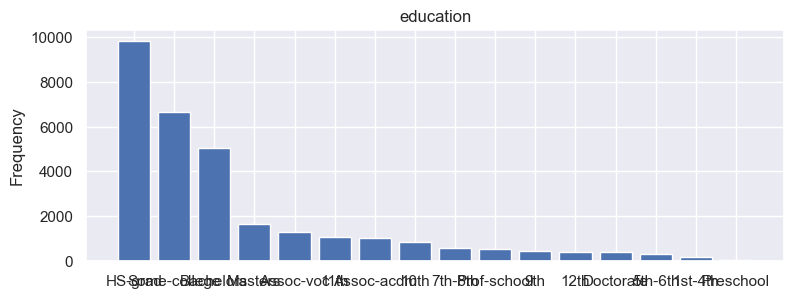

education: 
 education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64


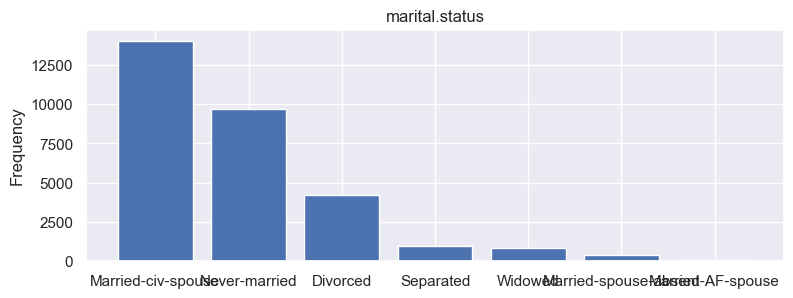

marital.status: 
 marital.status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64


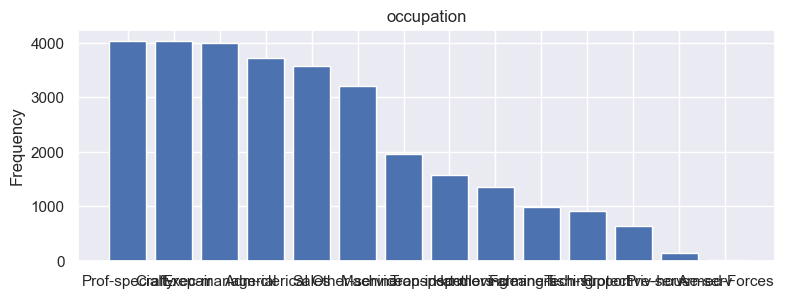

occupation: 
 occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64


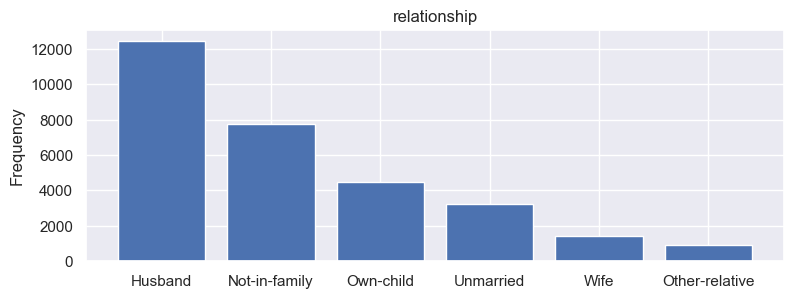

relationship: 
 relationship
Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: count, dtype: int64


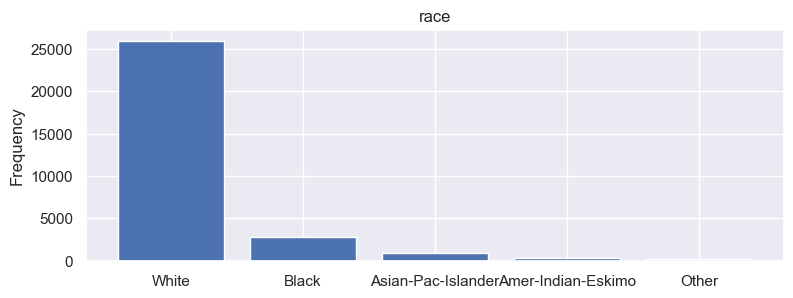

race: 
 race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64


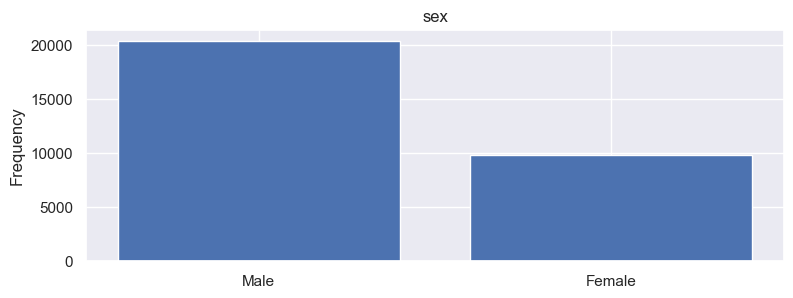

sex: 
 sex
Male      20380
Female     9782
Name: count, dtype: int64


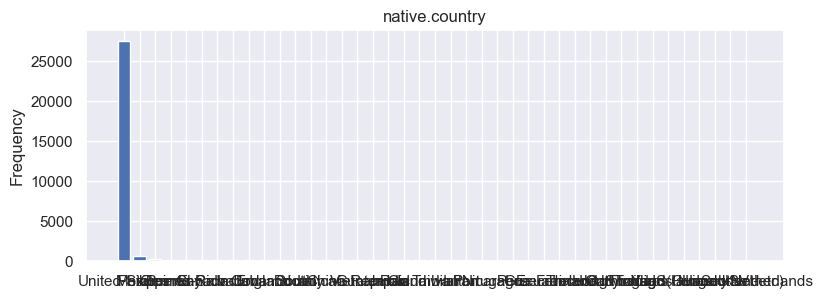

native.country: 
 native.country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                         

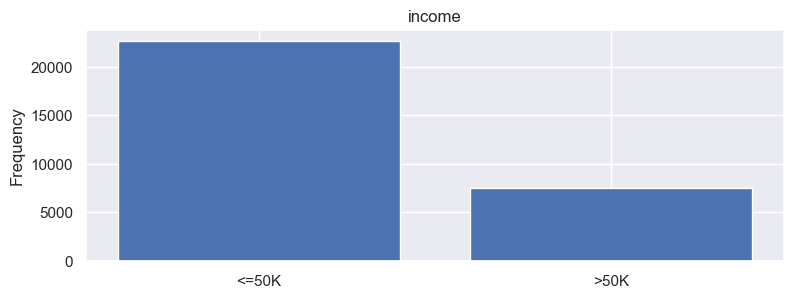

income: 
 income
<=50K    22654
>50K      7508
Name: count, dtype: int64


In [71]:
categorical_var = ["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex","native.country", "income"]
for each in categorical_var:
    bar_plot(df_cleaned, each)

## Sürekli Değişkenler:

In [72]:
def plot_hist(df_cleaned, variable):
    
    plt.figure(figsize = (9,3))
    plt.hist(df_cleaned[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

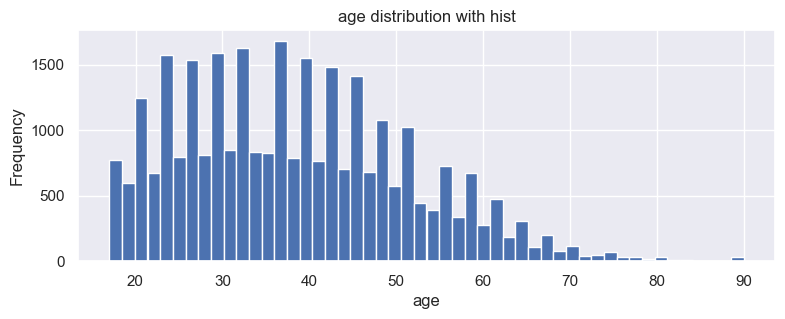

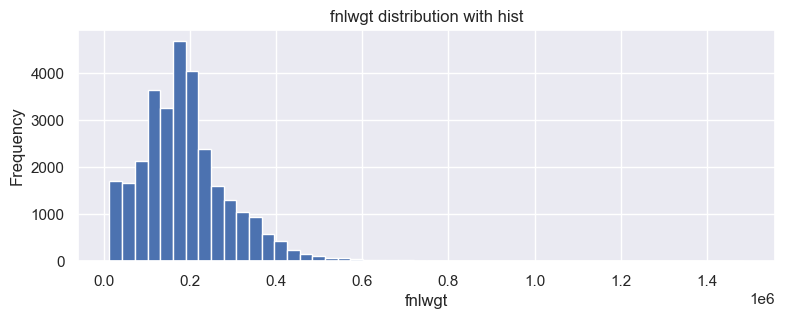

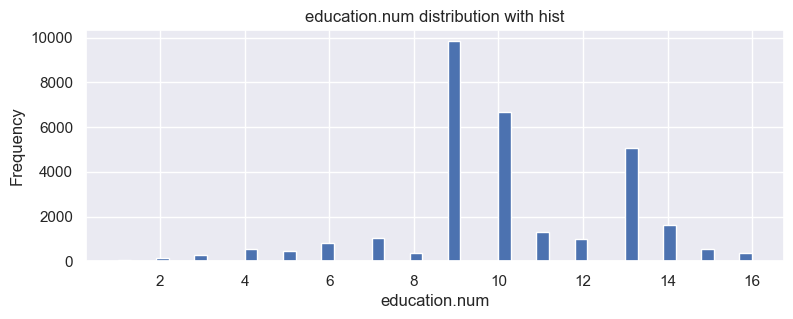

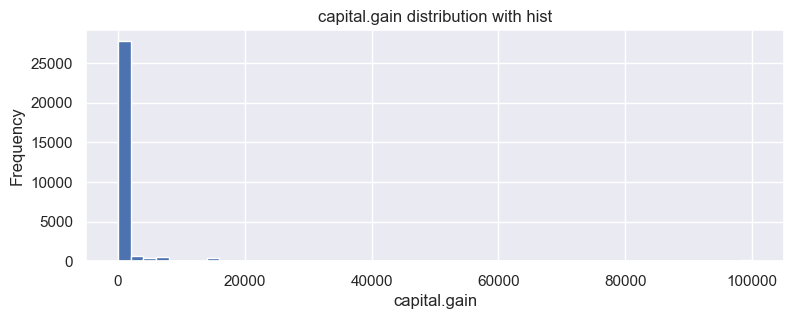

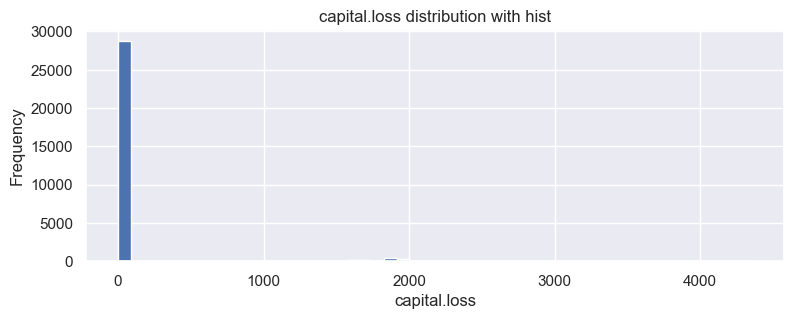

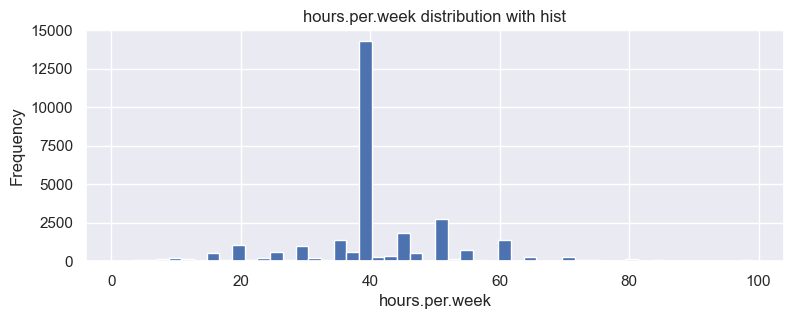

In [73]:
numerical_var = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]
for each in numerical_var:
    plot_hist(df_cleaned, each)

#### Veri Çıkarma ve Hedef Değişken Formatı
Kullanılmayan verileri çıkarıp, hedef değişkeni kategorik hale getiriyoruz. Çünkü verinin hedef değişkeni aslında sürekli değil kategorik bir değişkenmiş.

In [74]:
df_cleaned.drop(["fnlwgt",
                 "capital.gain",
                 "capital.loss"],
                axis=1,
                inplace=True)

In [75]:
df_cleaned.income = [1 if x == ">50K" else 0 for x in df_cleaned.income]

In [76]:
df_cleaned.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,0


# Görselleştirme Araçları İle Basit Data Analizi

#### Bu aşamada matploblib kütüphanesi ile bazı önemli değişkenler ile kişinin geliri arasındaki ilişkiye bakacağız.

* occupation vs income
* education vs income
* sex vs income
* race vs income

           occupation    income
3     Exec-managerial  0.485220
9      Prof-specialty  0.448489
10    Protective-serv  0.326087
12       Tech-support  0.304825
11              Sales  0.270647
2        Craft-repair  0.225310
13   Transport-moving  0.202926
0        Adm-clerical  0.133835
6   Machine-op-inspct  0.124619
4     Farming-fishing  0.116279
1        Armed-Forces  0.111111
5   Handlers-cleaners  0.061481
7       Other-service  0.041096
8     Priv-house-serv  0.006993


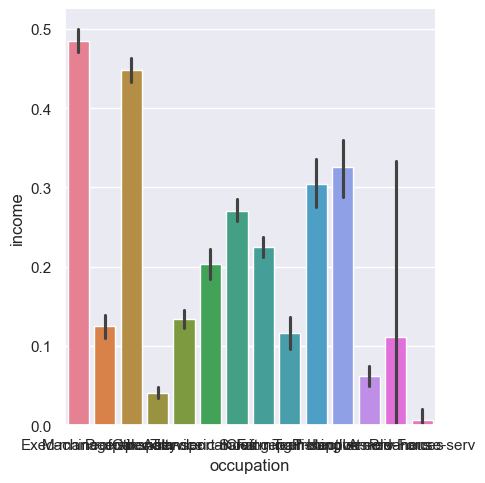

In [77]:
print(df_cleaned[["occupation",
                  "income"]].groupby(
                                ["occupation"],
                                as_index = False
                                    ).mean().sort_values(
                                        by="income",
                                        ascending = False))
visual = sns.catplot( # factorplot
    x = "occupation",
    y = "income",
    data = df_cleaned,
    kind = "bar",
    hue="occupation",
    height = 5)
visual.set_ylabels("income")
plt.show()

       education    income
14   Prof-school  0.749077
10     Doctorate  0.746667
12       Masters  0.564229
9      Bachelors  0.421491
8      Assoc-voc  0.263198
7     Assoc-acdm  0.253968
15  Some-college  0.200060
11       HS-grad  0.164329
2           12th  0.076923
0           10th  0.071951
5        7th-8th  0.062837
1           11th  0.056298
6            9th  0.054945
4        5th-6th  0.041667
3        1st-4th  0.039735
13     Preschool  0.000000


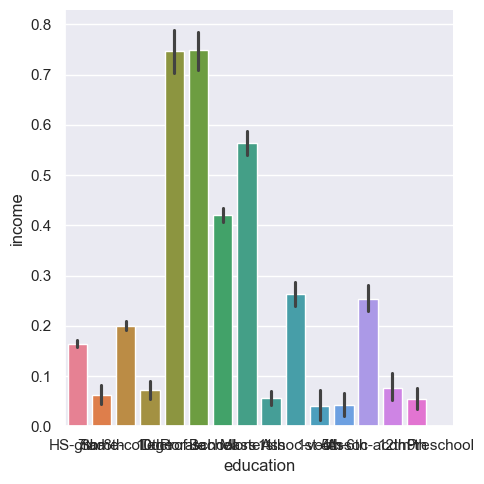

In [78]:
print(df_cleaned[["education","income"]].groupby(["education"], as_index = False).mean().sort_values(by="income",ascending = False))

g = sns.catplot(x = "education", y = "income", data = df_cleaned, kind = "bar", hue="education",
    height = 5)
g.set_ylabels("income")
plt.show()

      sex    income
1    Male  0.313837
0  Female  0.113678


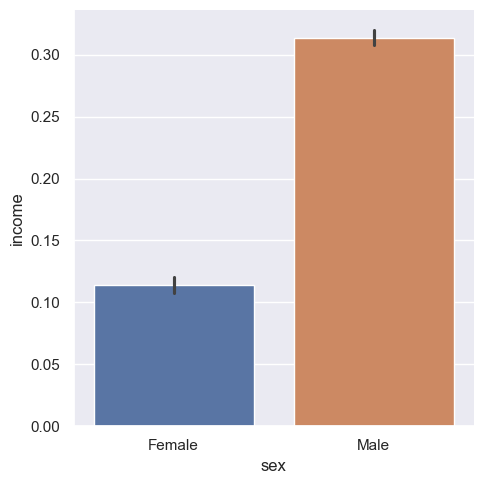

In [79]:
print(df_cleaned[["sex","income"]].groupby(["sex"], as_index = False).mean().sort_values(by="income",ascending = False))

g = sns.catplot(x = "sex", y = "income", data = df_cleaned, kind = "bar", hue="sex",
    height = 5)
g.set_ylabels("income")
plt.show()

                 race    income
1  Asian-Pac-Islander  0.277095
4               White  0.263718
2               Black  0.129925
0  Amer-Indian-Eskimo  0.118881
3               Other  0.090909


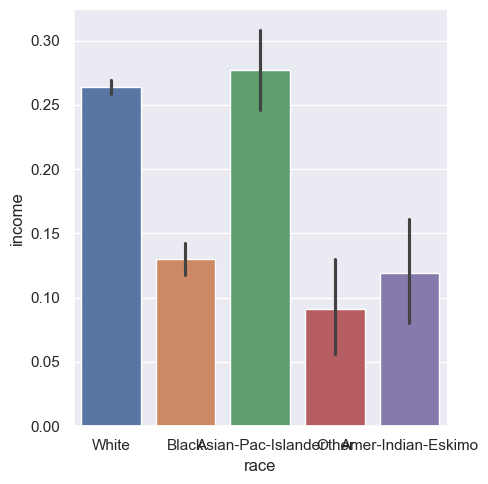

In [80]:
print(df_cleaned[["race","income"]].groupby(["race"], as_index = False).mean().sort_values(by="income",ascending = False))

g = sns.catplot(x = "race", y = "income", data = df_cleaned, kind = "bar", hue="race",
    height = 5)
g.set_ylabels("income")
plt.show()

# Sınıflandırma Algoritmaları için Veri Ön İşleme

#### Bu aşamada datamızda bulunan verileri sınıflandırma algoritmalarında eğitebilmek ve tahminler yapabilmek için hazırlayacağız.

#### Öncelikle datamızda bulunan kategorik değişkenleri sayısallaştırıyoruz.

In [81]:
df_cleaned = pd.get_dummies(df_cleaned,columns=["workclass",
                                "marital.status",
                                "occupation",
                                "relationship",
                                "race",
                                "sex",
                                "native.country"])

In [82]:
df_cleaned.head()

,age,education,education.num,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,HS-grad,9,18,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,7th-8th,4,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,Some-college,10,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,HS-grad,9,45,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
6,38,10th,6,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Gördüğünüz gibi **education** adlı column hariç tüm column'ları üzerinde işlem yapılabilir hale getirdik, **education** adlı column'da ise farklı bir işlem yapacağız.
#### Bu column'da kişinin eğitim durumu yer almaktadır ve diğer column'lar dan farklı olarak eğitim durumları arasında hiyerarşik bir ilişki yer vardır.
#### Bu yüzden one-hot dönüşümü yerine farklı bir metod kullanacağız.

In [83]:
education_ctgrs = pd.Categorical(df_cleaned["education"],
                                 categories=["Preschool",
                                             "1st-4th",
                                             "5th-6th",
                                             "7th-8th",
                                             "9th",
                                             "10th",
                                             "11th",
                                             "12th",
                                             "HS-grad",
                                             "Prof-school",
                                             "Assoc-acdm",
                                             "Assoc-voc",
                                             "Some-college",
                                             "Bachelors",
                                             "Masters",
                                             "Doctorate"],
                                 ordered=True)

In [84]:
df_cleaned["educations"], sıralı= pd.factorize(education_ctgrs,sort=True) 

#### Hiyerarşik olarak sıraladığımız ve sayısallaştırdığımız eğitim verilerine göz atalım ve kategorik hali ile kıyaslayalım.

In [85]:
print(df_cleaned[["education","educations"]])

          education  educations
1           HS-grad           8
3           7th-8th           3
4      Some-college          12
5           HS-grad           8
6              10th           5
...             ...         ...
32556  Some-college          12
32557    Assoc-acdm          10
32558       HS-grad           8
32559       HS-grad           8
32560       HS-grad           8

[30162 rows x 2 columns]


In [86]:
df_cleaned.drop(["education"],axis=1, inplace=True)

In [87]:
df_cleaned.head()

,age,education.num,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,educations
1,82,9,18,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,8
3,54,4,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,3
4,41,10,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,12
5,34,9,45,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,8
6,38,6,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,5


# Farklı Makine Öğrenmesi Algoritmaları ile Sınıflandırma

#### Bu aşamada datamızı farklı makine öğrenmesi sınıflandırma algoritmaları ile eğitip tahmin performanslarına bakacağız.

In [88]:
x = df_cleaned.drop(["income"],axis=1)
y = df_cleaned.income.values

# Train-Test Split

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Lojistik Regresyon:

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()

log.fit(x_train,y_train)

pred = log.predict(x_test)

#Modelimiz ne kadar başarılı görelim.
print("Lojistik Regresyon ile Accuracy skorumuz: ",accuracy_score(y_test,pred))

Lojistik Regresyon ile Accuracy skorumuz:  0.8234709099950274


# Karar Ağaçları:

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("Karar Ağaçları skoru: ", dt.score(x_test,y_test))

Karar Ağaçları skoru:  0.7820321564727333


# Random Forest:

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

rf.fit(x_train,y_train)

print("Rastgele Ormanlar skoru: ",rf.score(x_test,y_test))

Rastgele Ormanlar skoru:  0.8102105088678933


# KNN:

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)

pred_for_knn = knn.predict(x_test)

print("KNN ile skor: ",knn.score(x_test, y_test))

KNN ile skor:  0.7891596220785678


#### %79 doğruluk skoru aldık fakat KNN algoritmasında farklı K değerleri ile doğruluk skorunu artırabiliriz, doğruluk skorunun maksimumum olduğu K değerini bulmak için bir for döngüsü oluşturabiliriz.

k değeri 1 olduğunda doğruluk skoru 0.7689375103596884
k değeri 2 olduğunda doğruluk skoru 0.7888281120503895
k değeri 3 olduğunda doğruluk skoru 0.7891596220785678
k değeri 4 olduğunda doğruluk skoru 0.8040775733465937
k değeri 5 olduğunda doğruluk skoru 0.8002652080225426
k değeri 6 olduğunda doğruluk skoru 0.806232388529753
k değeri 7 olduğunda doğruluk skoru 0.809050223769269
k değeri 8 olduğunda doğruluk skoru 0.808055693684734
k değeri 9 olduğunda doğruluk skoru 0.8082214486988232
k değeri 10 olduğunda doğruluk skoru 0.8108735289242499
k değeri 11 olduğunda doğruluk skoru 0.8145201392342118
k değeri 12 olduğunda doğruluk skoru 0.8140228741919443
k değeri 13 olduğunda doğruluk skoru 0.8123653240510526
k değeri 14 olduğunda doğruluk skoru 0.8151831592905685
k değeri 15 olduğunda doğruluk skoru 0.8128625890933201
k değeri 16 olduğunda doğruluk skoru 0.8133598541355876
k değeri 17 olduğunda doğruluk skoru 0.8131940991214984
k değeri 18 olduğunda doğruluk skoru 0.8112050389524283
k de

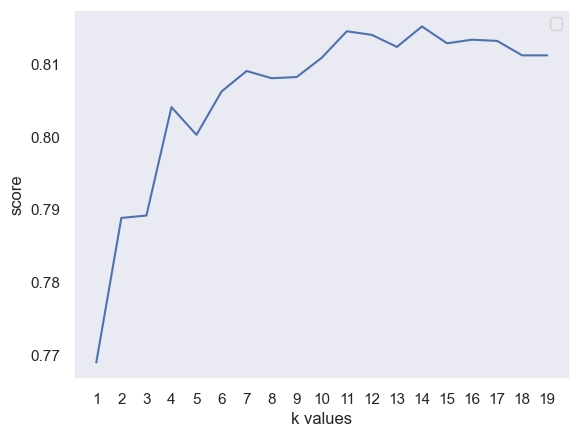

In [94]:
score_list = []

for x in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print("k değeri",x,"olduğunda doğruluk skoru",knn2.score(x_test,y_test))


plt.plot(range(1,20),score_list)
plt.xticks(range(1,20))
plt.xlabel("k values")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

#### Bu örnek için doğruluk skorunun en yüksek olduğu **K** değeri 14 dolayısıyla **K** değerimizi 14 olarak seçip algoritmamızı çalıştırabiliriz.